In [76]:
# Import pandas and matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import os

In [77]:
#if there is no graphs folder, make one
if not os.path.exists('graphs'):
    os.makedirs('graphs')

#if there is no genre_trend folder, make one
if not os.path.exists('graphs/genre_trend'):
    os.makedirs('graphs/genre_trend')

#after finishing a cell, check against this to avoid extra computation
REGENERATE_DATA = False

In [78]:
# Load dataset into dataframe
data_df = pd.read_csv('songs_normalize.csv')

#print dataframe
print(data_df)

              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode

Number of NaN values in this dataset: 0
Number of songs in this dataset: 2000
Number of years in this dataset: 23
Number of songs per year in this dataset:


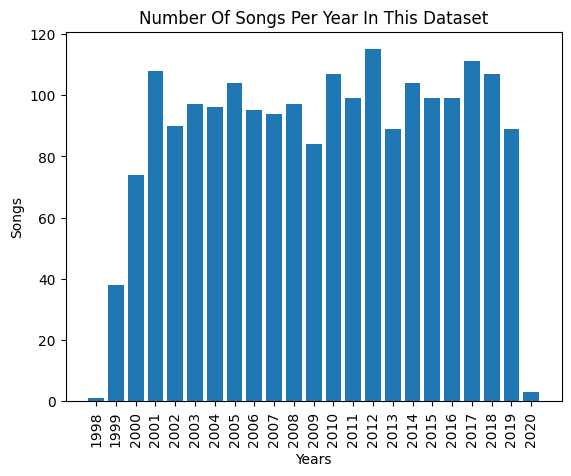

In [79]:
#UNDERSTANDING THE DATASET

#any NA values?
print("Number of NaN values in this dataset:", data_df.isna().sum().sum()) #0 NA values

#how many songs?
print("Number of songs in this dataset:", len(np.array(data_df['song'])) ) #2000 songs

#how many years?
print("Number of years in this dataset:", len(np.unique(data_df['year'])))

print("Number of songs per year in this dataset:")
#How many songs per year: get dictionary of unique year values
years_df = np.array(data_df['year'])
years, year_counts = np.unique(years_df, return_counts=True)
year_count_dict = dict(zip(years, year_counts))
# print(year_dict)

#visualize songs per year

plt.title("Number Of Songs Per Year In This Dataset")
plt.bar(range(len(year_count_dict)), list(year_count_dict.values()), align='center')
plt.xticks(range(len(year_count_dict)), list(year_count_dict.keys()), rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Songs")
plt.show()

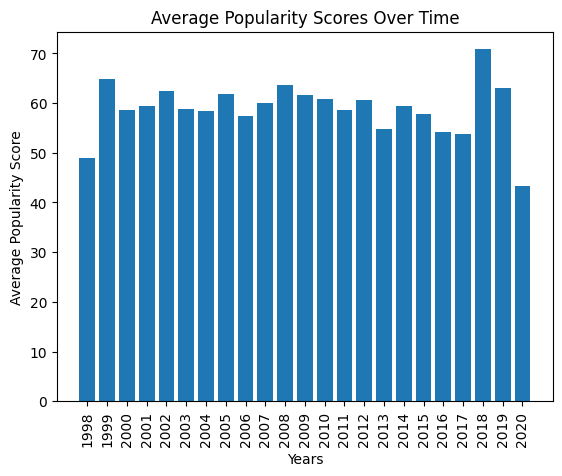

NOTE: 1998 and 2020 have considerably less songs to calculate popularity from, as shown by the 'Number Of Songs Per Year In This Dataset' graph above


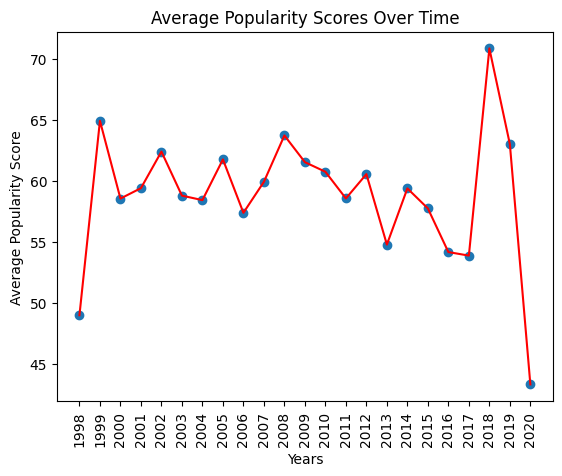

In [80]:
#HOW DOES POPULARITY WORK?

#track average popularity score per year over time
#dict: {year: [popularity total]}
#divide popularity total by year_count count

#initialize dictionary
total_popularity_dict = {}
for year in years:
    total_popularity_dict[year] = 0

#downselect to year and popularity columns only
popularity_df= data_df[['year','popularity']]
# print(popularity_df)

#sum up popularity scores for each year
for index, row in popularity_df.iterrows():
    total_popularity_dict[row['year']] += row['popularity']
# print(total_popularity_dict)

#calculate average popularity scores per year
avg_popularity_dict= {}
for year in years:
    avg_popularity_dict[year] = total_popularity_dict[year] / year_count_dict[year]
# print(avg_popularity_dict)


#visualize average popularity scores per year
plt.title("Average Popularity Scores Over Time")
plt.bar(range(len(avg_popularity_dict)), list(avg_popularity_dict.values()), align='center')
plt.xticks(range(len(avg_popularity_dict)), list(avg_popularity_dict.keys()), rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Average Popularity Score")
plt.show()

print("NOTE: 1998 and 2020 have considerably less songs to calculate popularity from, as shown by the 'Number Of Songs Per Year In This Dataset' graph above")

plt.title("Average Popularity Scores Over Time")
plt.scatter(range(len(avg_popularity_dict)), list(avg_popularity_dict.values()))
plt.plot(range(len(avg_popularity_dict)), list(avg_popularity_dict.values()), color= 'red')
plt.xticks(range(len(avg_popularity_dict)), list(avg_popularity_dict.keys()), rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Average Popularity Score")
plt.show()

In [81]:
#count the number of each genre and find the % of songs that are that genre per year

genre_df = data_df[['year','genre']] #downselect to year and genre columns only
#genre can be multiple genres, so split by comma and add a row for each genre
genre_df = genre_df.assign(genre=genre_df['genre'].str.split(',')).explode('genre')
genre_df['genre'] = genre_df['genre'].str.replace(' ', '')
genres = np.unique(np.array(genre_df['genre'])) #get list of unique genres
# print(genre_df)
# print("Genres:", genres)

#remove any spaces in genre names

#initialize dictionary
genre_count_dict = {}
for genre in genres:
    genre_count_dict[genre] = 0

#sum up genre counts for each year and genre
for year in years:
    genre_count_dict[year] = {}
    for genre in genres:
        genre_count_dict[year][genre] = 0

for index, row in genre_df.iterrows():
    genre_count_dict[row['year']][row['genre']] += 1

# print("Number of songs per genre per year:")
# print(genre_count_dict)


#calculate % of songs that are each genre per year
genre_percent_dict= {}
for year in years:
    genre_percent_dict[year] = {}
    for genre in genres:
        genre_percent_dict[year][genre] = genre_count_dict[year][genre] / year_count_dict[year]

# print("Percent of songs that are each genre per year:")
# print(genre_percent_dict)


if REGENERATE_DATA:
    #Each genre should have a line graph of % of songs that are that genre over time and be on the same graph
    plt.figure(figsize=(20,10))
    for genre in genres:
        plt.plot(range(len(genre_percent_dict)), [genre_percent_dict[year][genre] for year in years], label=genre)
    plt.title("Percent Of Songs That Are Each Genre Over Time")
    plt.xticks(range(len(genre_percent_dict)), list(genre_percent_dict.keys()), rotation='vertical')
    plt.xlabel("Years")
    plt.ylabel("Percent Of Songs That Are Each Genre")
    # plt.legend()
    #have the legend outside of the graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #save and show
    plt.savefig('graphs/genre_trend/overall.png', bbox_inches='tight')
    plt.show()

    #for each genre, make a line graph of % of songs that are that genre over time
    #save each graph to the genre_trend folder
    for genre in genres:
        plt.figure(figsize=(20,10))
        plt.plot(range(len(genre_percent_dict)), [genre_percent_dict[year][genre] for year in years], label=genre)
        plt.title("Percent Of Songs That Are " + genre + " Over Time")
        plt.xticks(range(len(genre_percent_dict)), list(genre_percent_dict.keys()), rotation='vertical')
        plt.yticks(np.arange(0,1, 0.05))
        plt.xlabel("Years")
        plt.ylabel("Percent Of Songs That Are " + genre)
        plt.legend()
        genre = genre.replace('/', '_')
        plt.savefig('graphs/genre_trend/' + genre + '.png', bbox_inches='tight')
        plt.close()



In [82]:
#make a bar graph for each year with different segments for each genre
if REGENERATE_DATA:
    for year in years:
        plt.clf()
        plt.figure(figsize=(20,10))
        title_string = "Number of Songs of Each Genre in " + str(year)
        plt.title(title_string)
        plt.bar(range(len(genres)), list(genre_count_dict[year].values()))
        plt.xticks(range(len(genres)), list(genre_count_dict[year].keys()), rotation='vertical')
        plt.xlabel("Years")
        plt.ylabel("Number of Songs")
        plt.savefig('graphs/genre_counts_per_year/' + str(year) + '.png', bbox_inches='tight')
        plt.close()

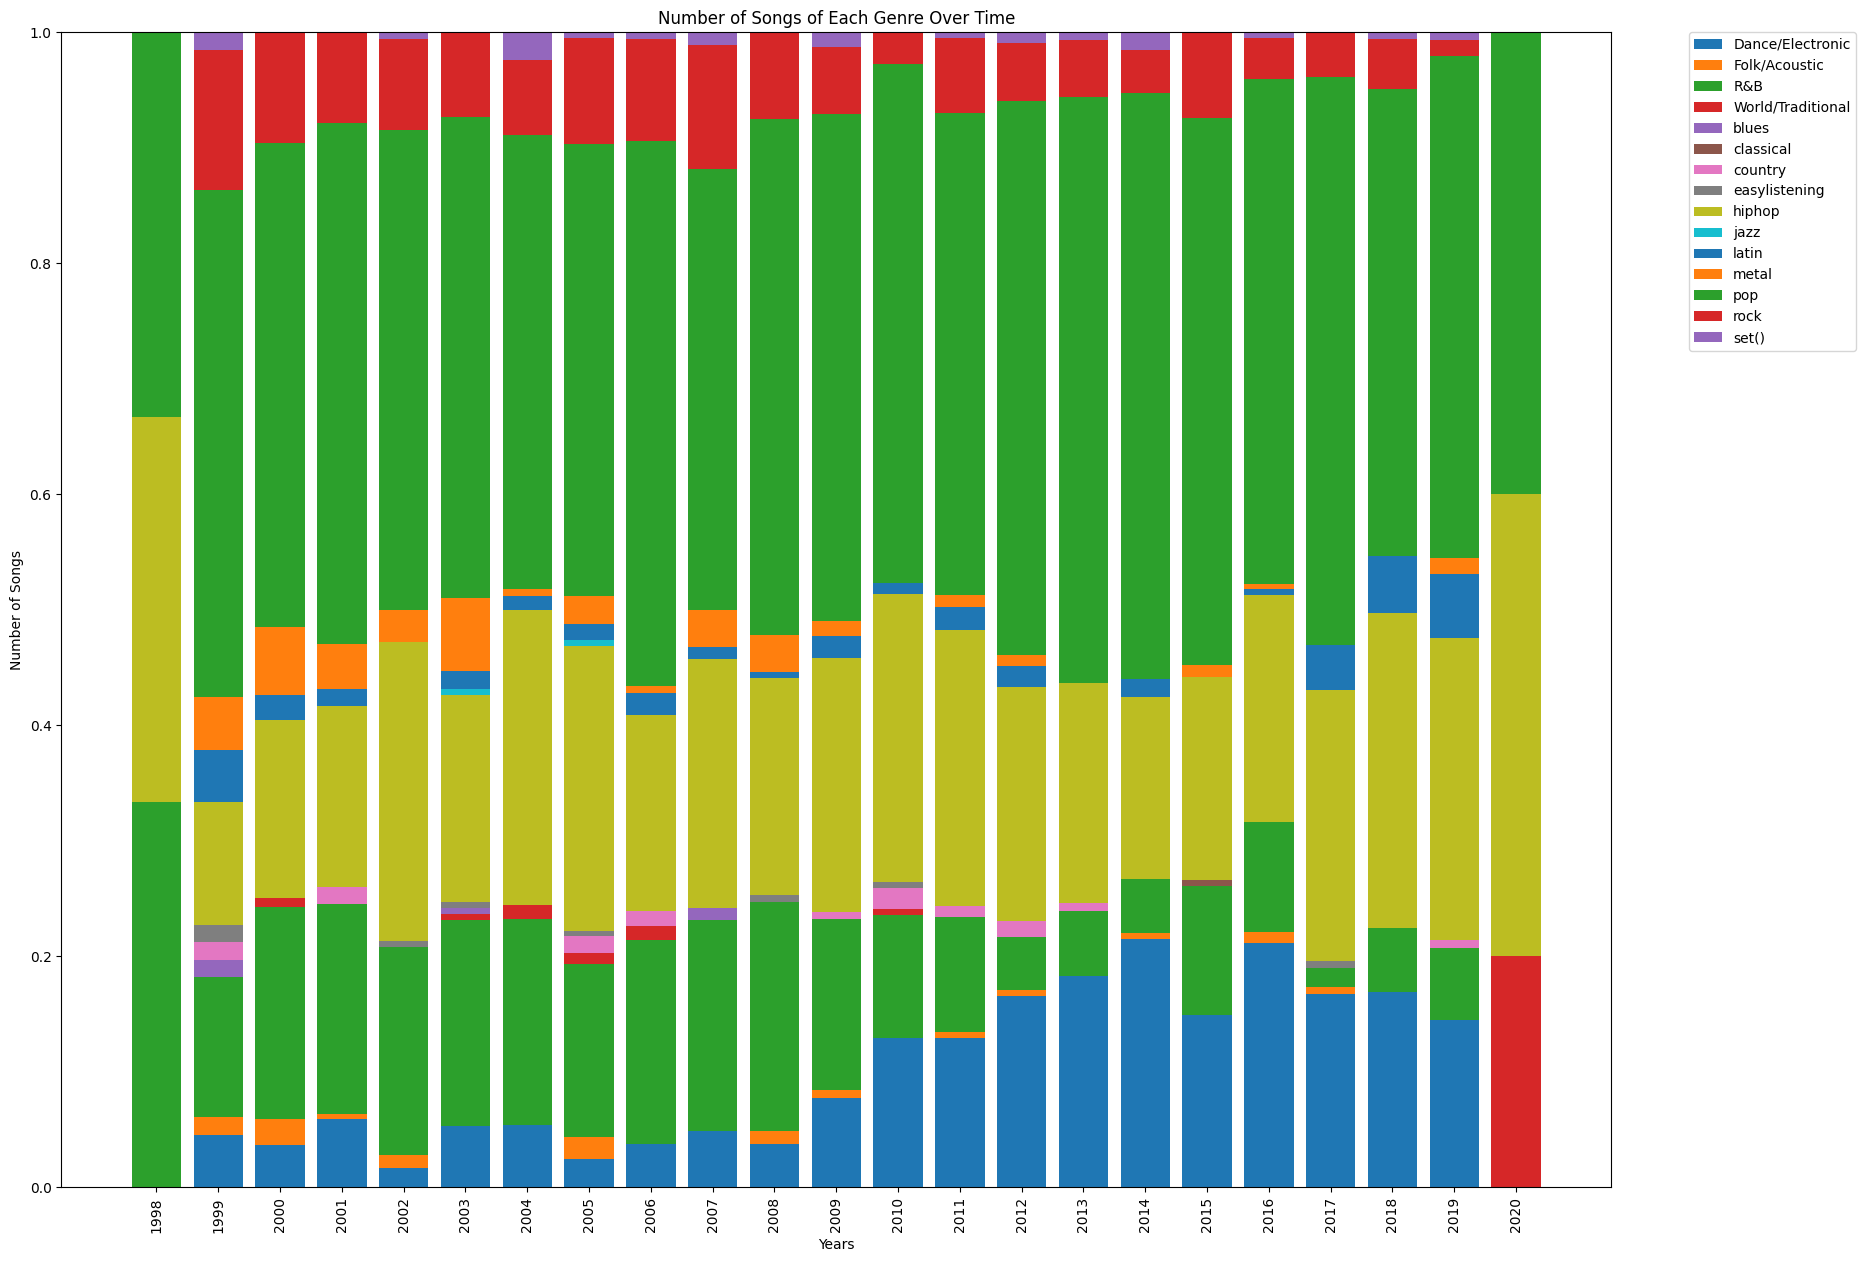

In [83]:
#make a single graph with x-axis years and y-axis the songs in each genre stacked on top of each other
data_counts = []
for genre in genres:
    #get list of all counts
    genre_counts = []
    for year in years:
        genre_counts.append(genre_count_dict[year][genre])
    data_counts.append(genre_counts)

#################### normalize data ####################
totals_per_year = []
for year in years:
    total = 0
    for genre in genres:
        total += genre_count_dict[year][genre]
    totals_per_year.append(total)

for i in range(len(data_counts)):
    for j in range(len(data_counts[i])):
        data_counts[i][j] = data_counts[i][j] / totals_per_year[j]
########################################################

plt.figure(figsize=(20,15))
bottom = np.zeros(len(data_counts[0]))
for i in range(len(data_counts)):
    if i == 0:
        # plt.bar(range(len(data_counts[i])), data_counts[i], label=top_genres[i])
        plt.bar(range(len(data_counts[i])), data_counts[i], label=genres[i])

    else:
        plt.bar(range(len(data_counts[i])), data_counts[i], bottom=bottom, label=genres[i])
    bottom += np.array(data_counts[i])
plt.title("Number of Songs of Each Genre Over Time")
plt.xticks(range(len(genre_percent_dict)), list(genre_percent_dict.keys()), rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Number of Songs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.savefig('graphs/genre_counts_per_year/stacked.png', bbox_inches='tight')
plt.show()
plt.close()
    


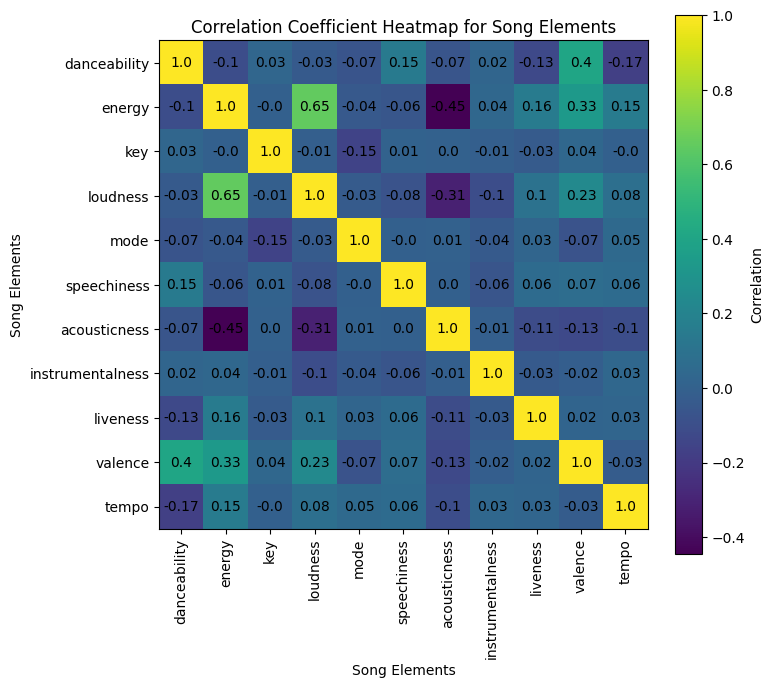

In [84]:
#Create correlation coefficient heatmap to see which track elements are most correlated with each other
#This code is adapted from https://kanoki.org/2022/01/17/matplotlib-heatmap-for-correlation-matrix-using-dataframe/
correlations_df = data_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

corr = correlations_df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(corr, interpolation='nearest')
ax.set_title("Correlation Coefficient Heatmap for Song Elements")

ax.set_xlabel("Song Elements")
ax.set_xticks(ticks=range(len(corr.columns)))
ax.set_xticklabels(labels=corr.columns, rotation=90)

ax.set_ylabel("Song Elements")
ax.set_yticks(ticks=range(len(corr.columns)))
ax.set_yticklabels(labels=corr.columns)

fig.colorbar(im, orientation='vertical', fraction= 0.05, label= "Correlation")

for i in range(len(correlations_df.columns)):
    for j in range(len(correlations_df.columns)):
        text = ax.text(j, i, round(corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

C:\Users\subfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\subfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\subfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\s

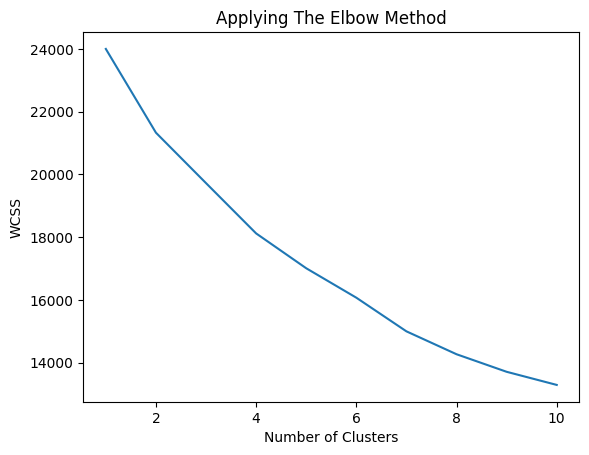

In [86]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

kmeans_df = data_df[['popularity', 'danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].values

scaler = StandardScaler()
kmeans_df = scaler.fit_transform(kmeans_df)

#Use elbow method to find number of clusters to use
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(kmeans_df)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Applying The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\subfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


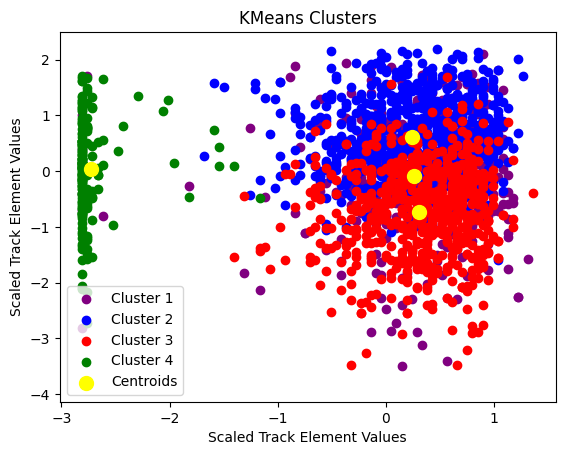

Number of songs in each cluster:
Cluster : Songs
1    807
2    640
0    371
3    182
Name: Cluster, dtype: int64


In [87]:
#elbow at 4 clusters
#use kmeans
km=KMeans(n_clusters=4, init = 'k-means++', random_state=42)
y_predicted = km.fit_predict(kmeans_df)

plt.clf()

#visualize clusters
plt.scatter(kmeans_df[y_predicted == 0, 0], kmeans_df[y_predicted==0, 1], c= 'purple', label= 'Cluster 1')
plt.scatter(kmeans_df[y_predicted == 1, 0], kmeans_df[y_predicted==1, 1], c= 'blue', label= 'Cluster 2')
plt.scatter(kmeans_df[y_predicted == 2, 0], kmeans_df[y_predicted==2, 1], c= 'red', label= 'Cluster 3')
plt.scatter(kmeans_df[y_predicted == 3, 0], kmeans_df[y_predicted==3, 1], c= 'green', label= 'Cluster 4')
# plt.scatter(kmeans_df[y_predicted == 4, 0], kmeans_df[y_predicted==4, 1], c= 'orange', label= 'Cluster 5')
# plt.scatter(kmeans_df[y_predicted == 5, 0], kmeans_df[y_predicted==5, 1], c= 'purple', label= 'Cluster 6')
# plt.scatter(kmeans_df[y_predicted == 6, 0], kmeans_df[y_predicted==6, 1], c= 'pink', label= 'Cluster 7')
# plt.scatter(kmeans_df[y_predicted == 7, 0], kmeans_df[y_predicted==7, 1], c= 'black', label= 'Cluster 8')

#visualize centers of clusters

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('KMeans Clusters')
plt.xlabel("Scaled Track Element Values")
plt.ylabel("Scaled Track Element Values")
plt.legend()
plt.show()

data_df['Cluster'] = y_predicted
print("Number of songs in each cluster:")
print("Cluster : Songs")
print(data_df['Cluster'].value_counts())